# KPI's

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Importamos todas las hojas del archivo excel

In [7]:
hojas = pd.read_excel("../data/Internet.xlsx", sheet_name=None)

### cada hoja la identificamos de modo que tenga mas sentido para cada uno

In [8]:
velConexionLocalidades = hojas['Acc_vel_loc_sinrangos'] #velocidades especificas #ESTE DF NO PUEDE SER FILTRADO CON 'DROPNA'
velConexionProvincias = hojas['Velocidad_sin_Rangos'] #velocidades especificas
mbpsBajadaPorvincias = hojas['Velocidad % por prov']
mbpsBajadaTrimestral = hojas['Totales VMD']
tipoConexion = hojas['Accesos_tecnologia_localidad']
tipoConexionTrimestral = hojas['Totales Accesos Por Tecnología']
tipoConexionProvincias = hojas['Accesos Por Tecnología']
dialBaf = hojas['Dial-BAf']
dialBafTrimestral = hojas['Totales Dial-BAf']
accesoPoblacionalPersonas = hojas['Penetración-poblacion']
accesoPoblacionalHogares = hojas['Penetracion-hogares']
accesoPoblacionalTrimestal = hojas['Penetracion-totales']
velInternetTrimestral = hojas['Totales Accesos por velocidad'] #esta velocidad se mido por intervalos 
velInternetProvincias = hojas['Accesos por velocidad'] #esta velocidad se mide por intervalos
ingresos = hojas['Ingresos']

#### mientras se escogen los datos que se van a usar se limpia cada DF

In [ ]:
velConexionLocalidades
velConexionProvincias
mbpsBajadaPorvincias
mbpsBajadaTrimestral
tipoConexion
tipoConexionTrimestral
tipoConexionProvincias
dialBaf
dialBafTrimestral
accesoPoblacionalPersonas
accesoPoblacionalHogares
accesoPoblacionalTrimestal
velInternetTrimestral
velInternetProvincias
ingresos

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Jun-Mar 2023
4,2033,1,1.041350e+08,Ene-Mar 2023
5,2022,4,7.244348e+07,Oct-Dic 2022
6,2022,3,6.408678e+07,Jul-Sept 2022
7,2022,2,6.041950e+07,Abr-Jun 2022
8,2022,1,5.521931e+07,Ene-Mar 2022
9,2021,4,4.546789e+07,Oct-Dic 2021


In [11]:
velConexionLocalidades = velConexionLocalidades.dropna(how='any')

In [16]:
velConexionLocalidades.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 125 entries, Provincia to 10000 Mbps
dtypes: float64(121), object(4)
memory usage: 0.0+ bytes


In [17]:
mbpsBajadaPorvincias.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50


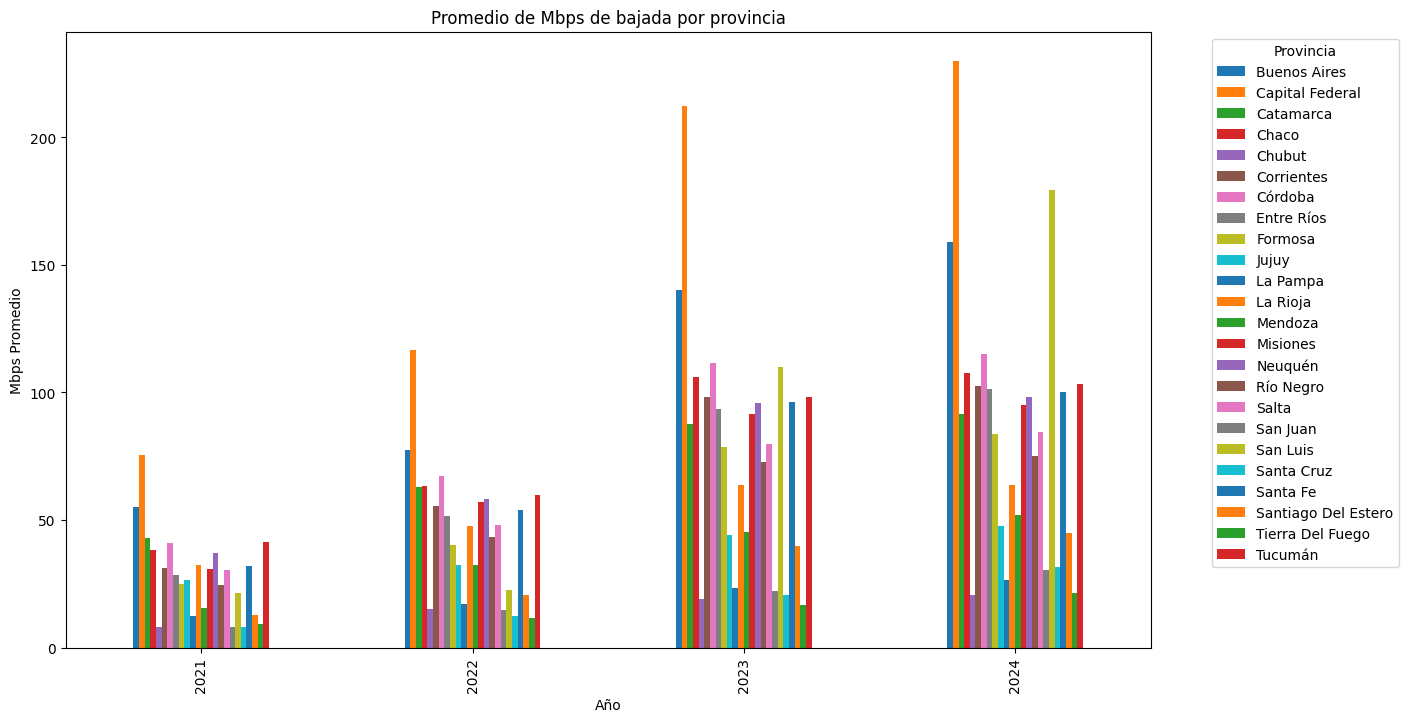

In [30]:
year = [2021,2022,2023,2024]
mbpsBajada4year = mbpsBajadaPorvincias[mbpsBajadaPorvincias['Año'].isin(year)]
promedio = mbpsBajada4year.groupby(['Año','Provincia'])['Mbps (Media de bajada)'].mean().unstack()

promedio.plot(kind='bar', stacked=False, figsize=(14,8))
plt.title('Promedio de Mbps de bajada por provincia')
plt.ylabel('Mbps Promedio')
plt.xlabel('Año')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Provincia')
plt.show()